# Describe the datasets

In [3]:
import pandas as pd

# Load both datasets
file1_path = "/content/market basket data 1.csv"
file2_path = "/content/market basket data 2.csv"

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

df1.head(), df2.head()


(   Member_number        Date   itemDescription  year  month  day  day_of_week
 0           1808  21-07-2015    tropical fruit  2015      7   21            1
 1           2552  01-05-2015        whole milk  2015      5    1            4
 2           2300  19-09-2015         pip fruit  2015      9   19            5
 3           1187  12-12-2015  other vegetables  2015     12   12            5
 4           3037  02-01-2015        whole milk  2015      1    2            4,
              0                   1                    2       3    4    5  \
 0   whole milk              pastry          salty snack     NaN  NaN  NaN   
 1      sausage          whole milk  semi-finished bread  yogurt  NaN  NaN   
 2         soda  pickled vegetables                  NaN     NaN  NaN  NaN   
 3  canned beer     misc. beverages                  NaN     NaN  NaN  NaN   
 4      sausage    hygiene articles                  NaN     NaN  NaN  NaN   
 
      6    7    8    9   10  
 0  NaN  NaN  NaN  NaN  N

# Check for missing values and duplicates in both datasets
# calculate Regression analysis and Random forest analysis with prediction

In [6]:
# Check for missing values and duplicates in both datasets
missing_df1 = df1.isnull().sum()
missing_df2 = df2.isnull().sum()

duplicates_df1 = df1.duplicated().sum()
duplicates_df2 = df2.duplicated().sum()

# For regression and prediction, let's aggregate dataset 1 by date to create a time series of item purchases per day
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
daily_sales = df1.groupby('Date').size().reset_index(name='item_count')

# Description analysis of item counts per day
description_stats = daily_sales['item_count'].describe()

# Prepare data for regression and random forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Add date-based features
daily_sales['day'] = daily_sales['Date'].dt.day
daily_sales['month'] = daily_sales['Date'].dt.month
daily_sales['weekday'] = daily_sales['Date'].dt.weekday

# Features and target
X = daily_sales[['day', 'month', 'weekday']]
y = daily_sales['item_count']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

missing_df1, missing_df2.head(), duplicates_df1, duplicates_df2, description_stats, (lr_mse, lr_r2), (rf_mse, rf_r2)


(Member_number      0
 Date               0
 itemDescription    0
 year               0
 month              0
 day                0
 day_of_week        0
 dtype: int64,
 0        0
 1        0
 2    10080
 3    12778
 4    14168
 dtype: int64,
 np.int64(759),
 np.int64(5852),
 count    728.000000
 mean      53.248626
 std       12.911187
 min       22.000000
 25%       44.000000
 50%       53.000000
 75%       62.000000
 max       96.000000
 Name: item_count, dtype: float64,
 (184.55082874266398, -0.018086300589706283),
 (247.36060136986305, -0.3645803775362322))

# Regression analysis and Random forest charts prediction

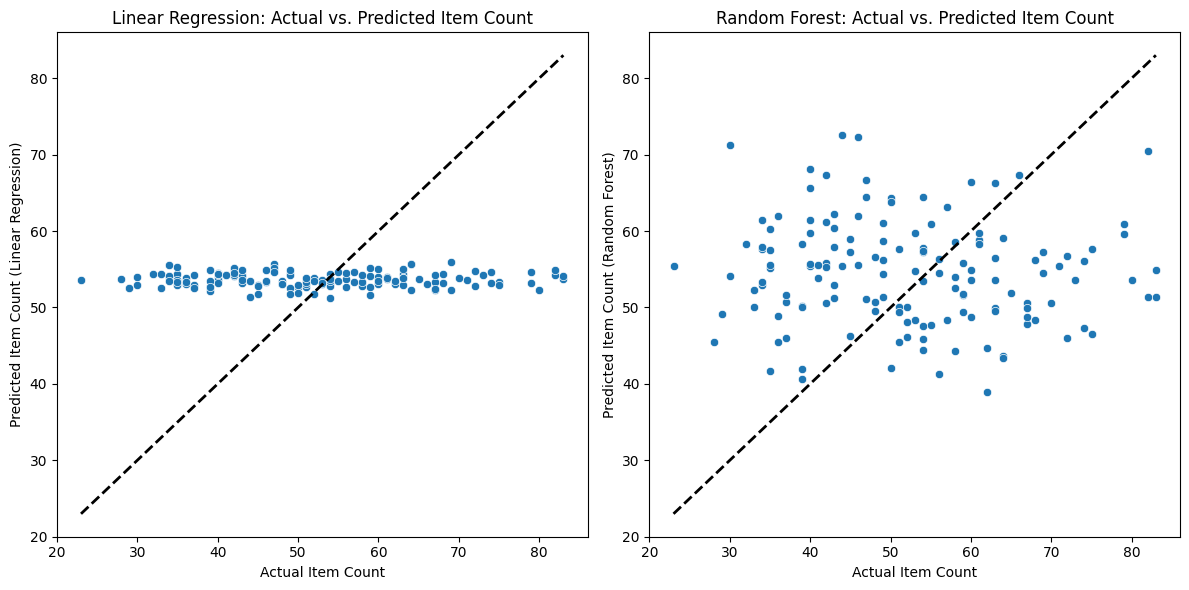

In [29]:


import matplotlib.pyplot as plt
import seaborn as sns

# Plotting results for Regression Analysis
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted values for Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Identity line
plt.xlabel("Actual Item Count")
plt.ylabel("Predicted Item Count (Linear Regression)")
plt.title("Linear Regression: Actual vs. Predicted Item Count")

# Plotting results for Random Forest
# Scatter plot of actual vs predicted values for Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Identity line
plt.xlabel("Actual Item Count")
plt.ylabel("Predicted Item Count (Random Forest)")
plt.title("Random Forest: Actual vs. Predicted Item Count")

plt.tight_layout()
plt.show()

# Finding the Top first purchase item

In [24]:
top_item = df['itemDescription'].value_counts().nlargest(1)
print("\nTop 1 Most Purchased Item:")
top_item


Top 1 Most Purchased Item:


,count
itemDescription,
whole milk,2502


# Finding the  Top 10 most purchased items, monthly purchased item and day of week purchase item

/tmp/ipython-input-4-2130041745.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
/tmp/ipython-input-4-2130041745.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dayofweek_counts.index, y=dayofweek_counts.values, palette='coolwarm')


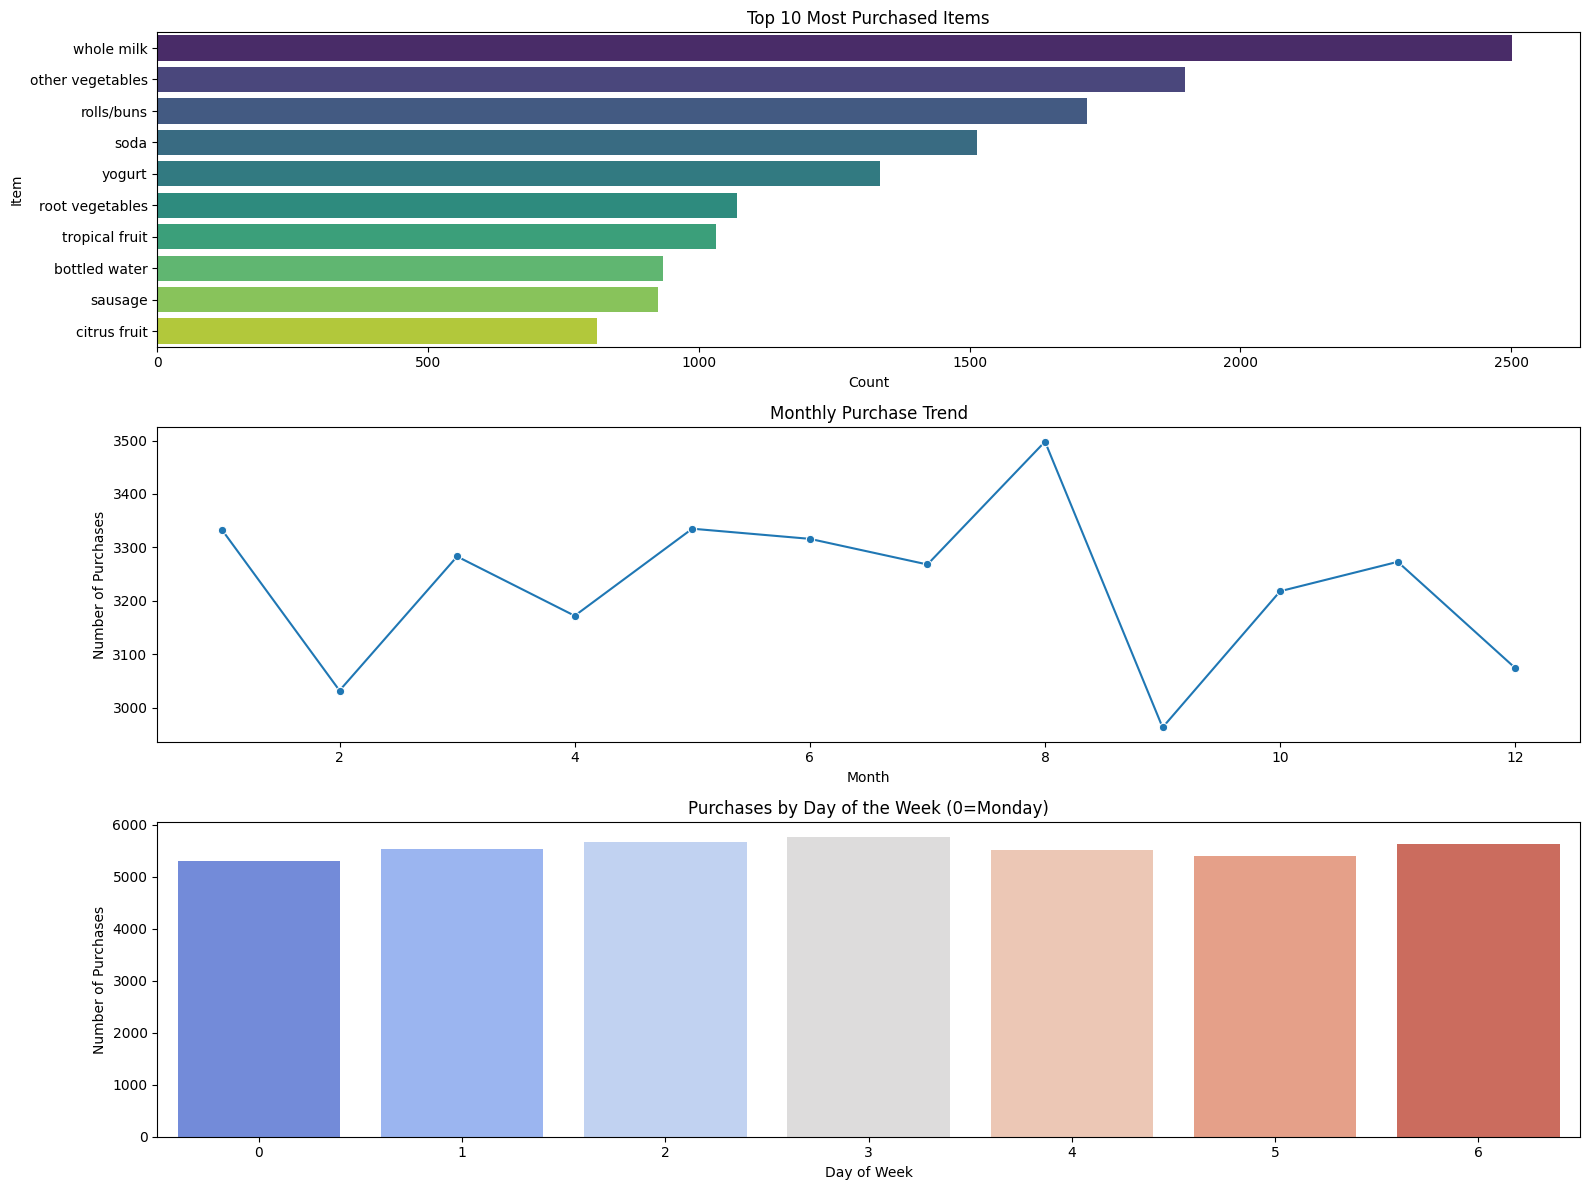

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# 1. Analysis of Dataset 1

# Most frequently purchased items
top_items = df1['itemDescription'].value_counts().head(10)

# Monthly item purchase count
monthly_counts = df1.groupby('month')['itemDescription'].count()

# Day of week purchase trend
dayofweek_counts = df1.groupby('day_of_week')['itemDescription'].count()

# Plotting
plt.figure(figsize=(16, 12))

# Top 10 items
plt.subplot(3, 1, 1)
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title("Top 10 Most Purchased Items")
plt.xlabel("Count")
plt.ylabel("Item")

# Monthly trend
plt.subplot(3, 1, 2)
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title("Monthly Purchase Trend")
plt.xlabel("Month")
plt.ylabel("Number of Purchases")

# Day of week trend
plt.subplot(3, 1, 3)
sns.barplot(x=dayofweek_counts.index, y=dayofweek_counts.values, palette='coolwarm')
plt.title("Purchases by Day of the Week (0=Monday)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Purchases")

plt.tight_layout()
plt.show()


# Top 10 unique items purchased

Member_number
2051    26
1379    26
4875    25
3050    25
3308    24
3180    24
1410    24
2433    24
3737    24
1052    23
Name: itemDescription, dtype: int64


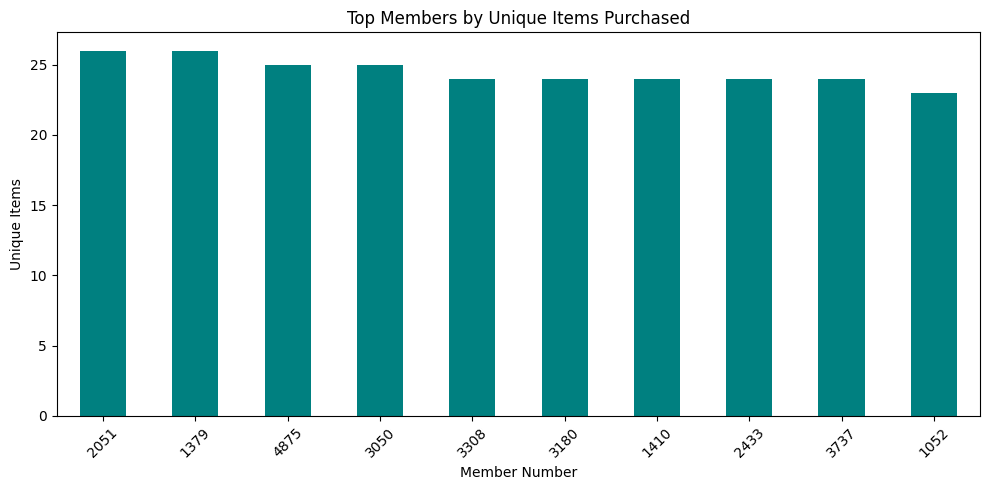

In [16]:
unique_items_per_member = df1.groupby('Member_number')['itemDescription'].nunique().sort_values(ascending=False).head(10)
print(unique_items_per_member)

# Plot
plt.figure(figsize=(10,5))
unique_items_per_member.plot(kind='bar', color='teal')
plt.title('Top Members by Unique Items Purchased')
plt.ylabel('Unique Items')
plt.xlabel('Member Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Unique items list

In [26]:


# List all unique items in dataset 1
unique_items_list = df1['itemDescription'].unique()

print("Unique Purchase Items:")
for item in unique_items_list:
    print(item)

# Alternatively, print the number of unique items and the list
print(f"\nTotal number of unique items: {len(unique_items_list)}")
# print(unique_items_list) # Uncomment to print the list as an array

Unique Purchase Items:
tropical fruit
whole milk
pip fruit
other vegetables
rolls/buns
pot plants
citrus fruit
beef
frankfurter
chicken
butter
fruit/vegetable juice
packaged fruit/vegetables
chocolate
specialty bar
butter milk
bottled water
yogurt
sausage
brown bread
hamburger meat
root vegetables
pork
pastry
canned beer
berries
coffee
misc. beverages
ham
turkey
curd cheese
red/blush wine
frozen potato products
flour
sugar
frozen meals
herbs
soda
detergent
grapes
processed cheese
fish
sparkling wine
newspapers
curd
pasta
popcorn
finished products
beverages
bottled beer
dessert
dog food
specialty chocolate
condensed milk
cleaner
white wine
meat
ice cream
hard cheese
cream cheese 
liquor
pickled vegetables
liquor (appetizer)
UHT-milk
candy
onions
hair spray
photo/film
domestic eggs
margarine
shopping bags
salt
oil
whipped/sour cream
frozen vegetables
sliced cheese
dish cleaner
baking powder
specialty cheese
salty snack
Instant food products
pet care
white bread
female sanitary products
c

# Calculate the Skewness and kurtosis

In [18]:
from scipy.stats import skew, kurtosis

skewness = skew(daily_purchases)
kurt = kurtosis(daily_purchases)

print("Skewness:", skewness)
print("Kurtosis:", kurt)


Skewness: 0.35187615035777936
Kurtosis: 0.00025605451080146224


# Calculate Z-Score for Outlier Detection (on daily purchases)

In [28]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = zscore(daily_purchases)

# Outliers: where Z > 3
outliers = daily_purchases[z_scores > 3]
print("Outliers:\n", outliers)


Outliers:
 Date
2015-01-21    96
2015-07-21    93
2015-08-08    92
2015-11-29    92
dtype: int64


# Calculate Correlation Between Day, Month, Weekday & Purchases

Correlation Matrix:
             item_count       day     month   weekday
item_count    1.000000  0.035127 -0.040087  0.029916
day           0.035127  1.000000  0.004350  0.005246
month        -0.040087  0.004350  1.000000 -0.007586
weekday       0.029916  0.005246 -0.007586  1.000000


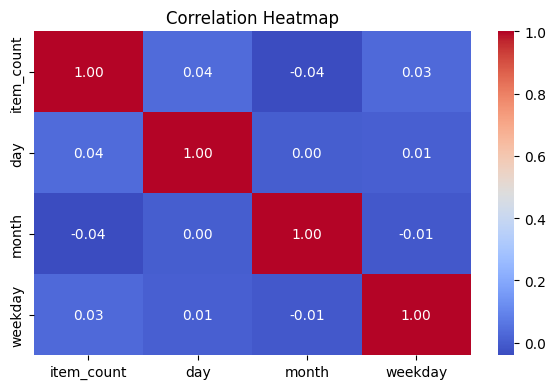

In [20]:
daily_df = df1.groupby('Date').size().reset_index(name='item_count')
daily_df['Date'] = pd.to_datetime(daily_df['Date'])
daily_df['day'] = daily_df['Date'].dt.day
daily_df['month'] = daily_df['Date'].dt.month
daily_df['weekday'] = daily_df['Date'].dt.weekday

# Correlation matrix
corr = daily_df[['item_count', 'day', 'month', 'weekday']].corr()
print("Correlation Matrix:\n", corr)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# Calculate T-test: Compare Weekend vs Weekday Purchases

In [21]:
# Create weekend flag
daily_df['is_weekend'] = daily_df['weekday'].isin([5,6])
weekend = daily_df[daily_df['is_weekend'] == True]['item_count']
weekday = daily_df[daily_df['is_weekend'] == False]['item_count']

from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(weekend, weekday)

print(f"T-test:\n t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")


T-test:
 t-statistic = -0.347, p-value = 0.7283


# Calculate ANOVA Test: Do Different Months Have Significantly Different Purchase Volumes

In [22]:
from scipy.stats import f_oneway

monthly_groups = [group['item_count'].values for _, group in daily_df.groupby('month')]
f_stat, p_val = f_oneway(*monthly_groups)

print(f"ANOVA Test:\n F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")


ANOVA Test:
 F-statistic = 1.278, p-value = 0.2327
